# Наша первая ARTM

- подобрать число тем, гиперпараметры, попробовать разные регуляризаторы, разные размеры словаря
- сохранять хорошие модели с внятными названиями
- скрипт должен быть +- универсальным для всех трёх входов 

In [6]:
import sys
sys.path.append("/Users/dmitrys/bigartm/python")
import artm

In [10]:
# batch_vectorizer = artm.BatchVectorizer(data_path='../data_artm/classic_rap_shanson_jazz_comments_v1',
#                                         data_format='vowpal_wabbit',
#                                         target_folder='../data_artm/top_music_batches')

# # заводим словарь
# dictionary = artm.Dictionary()
# dictionary.gather(data_path='../data_artm/top_music_batches')

# dictionary.save(dictionary_path='../data_artm/top_music_batches/top_music_dictionary.dict')


#когда батчи уже сварены и словарь уже создан
batch_vectorizer = artm.BatchVectorizer(data_path='../data_artm/top_music_batches',
                                        data_format='batches')

dictionary = artm.Dictionary()
dictionary.load(dictionary_path='../data_artm/top_music_batches/top_music_dictionary.dict')

In [11]:
model = artm.ARTM(num_topics=20, dictionary=dictionary)

In [12]:
# Накинули сверху перплексию 
perplexity = artm.PerplexityScore(name='perplexity_score', dictionary=dictionary)
model.scores.add(perplexity)

Важно: возможно, нам нужно офлайновое обучение!

In [13]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

In [21]:
model.score_tracker['perplexity_score'].last_value

1234.240478515625

In [23]:
model.score_tracker['perplexity_score'].value

[418297.4375,
 2645.9619140625,
 1924.11962890625,
 1626.799072265625,
 1470.090576171875,
 1375.2349853515625,
 1315.6241455078125,
 1277.2752685546875,
 1251.8311767578125,
 1234.240478515625]

In [24]:
model.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score'))
model.scores.add(artm.SparsityThetaScore(name='sparsity_theta_score'))
model.scores.add(artm.TopTokensScore(name='top_tokens_score'))

In [25]:
model.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score_10_topics', topic_names=model.topic_names[0: 9]))

In [26]:
model.num_tokens = 20

In [27]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

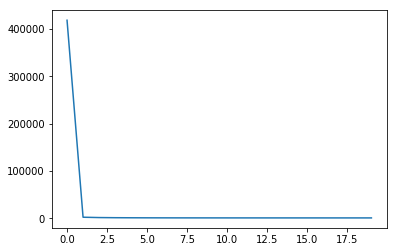

In [32]:
plt.plot(model.score_tracker['perplexity_score'].value)      # .last_value

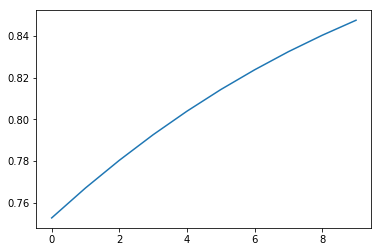

In [33]:
plt.plot(model.score_tracker['sparsity_phi_score'].value)    # .last_value

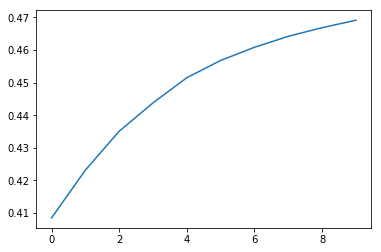

In [34]:
plt.plot(model.score_tracker['sparsity_theta_score'].value)  # .last_value

In [35]:
saved_top_tokens = model.score_tracker['top_tokens_score'].last_tokens

for topic_name in model.topic_names:
    print(saved_top_tokens[topic_name])

['0', 'ребята', 'мота', 'никита', 'любить', 'хороший|@likes', 'песня|@likes', 'егор', 'пожалуйста|@likes', 'саша']
['трек', 'быть', 'клип', 'знать', '0', 'песнь', 'слушать', 'билет', 'какой', 'новое']
['свой', 'такой', 'ты', 'человек', 'сказать', 'мочь', 'вообще', 'который', 'твой', 'делать']
['весь', 'ваня', 'деньга', 'давно', 'василий', 'топ', 'рука', 'нужно', 'жить', 'который']
['мой', 'год', 'мирон', 'кто', 'нойз', 'время', 'кома', 'говорить', 'хотя', 'нужный']
['это', 'один', 'фэйскрыса', 'рэп', 'русский', 'наш', 'жизнь', 'большой', 'сам', 'надеяться']
['хороший', 'музыка', 'думать', 'ваш', 'этот', 'текст', 'другой', 'читать', 'стать', 'должный']
['фейскрыса', 'эщкер', 'сухой', 'пенза', 'лог', 'фейскрыса|@likes', '0', 'абажай', 'мияг', 'эншпылять']
['2', 'очень', 'ещё', '7', 'крутой', 'олег', 'круто', 'понравиться', 'согласный', 'отличный']
['0', 'просто', 'песня', 'почему', 'трек|@likes', 'найти', 'купить', 'любимый', 'кирилл', 'слушать|@likes']
['1', '3', 'хотеть', 'оксить', 'др